In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
import statistics
from sklearn.metrics import confusion_matrix
import seaborn as sns

2023-04-26 09:22:16.053696: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-26 09:22:16.102818: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 09:22:16.856209: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
shower_dp = 'data/Showerthoughts.csv'
shower_data = pd.read_csv(shower_dp,header=0)
# shower_data = shower_data.append(pd.read_csv('data/worldnews.csv', header=0))
shower_data = shower_data.append(pd.read_csv('data/todayilearned.csv', header=0))
shower_data = shower_data.append(pd.read_csv('data/movies.csv', header=0))
shower_data = shower_data.append(pd.read_csv('data/Jokes.csv', header=0))



# shower_data.head()
shower_data

/tmp/ipykernel_1178360/953333257.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shower_data = shower_data.append(pd.read_csv('data/todayilearned.csv', header=0))
/tmp/ipykernel_1178360/953333257.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shower_data = shower_data.append(pd.read_csv('data/movies.csv', header=0))
/tmp/ipykernel_1178360/953333257.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  shower_data = shower_data.append(pd.read_csv('data/Jokes.csv', header=0))


,created_utc,score,domain,id,title,ups,downs,num_comments,permalink,selftext,...,over_18,thumbnail,subreddit_id,edited,link_flair_css_class,author_flair_css_class,is_self,name,url,distinguished
0,1.372964e+09,2785,self.Showerthoughts,1hncvt,"If Hillary Clinton wins in 2016, it will be th...",4750,1965,265,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1hncvt,http://www.reddit.com/r/Showerthoughts/comment...,NaN
1,1.372606e+09,2488,self.Showerthoughts,1hd8in,I am just a penis. The rest of me is just ther...,4011,1523,162,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1hd8in,http://www.reddit.com/r/Showerthoughts/comment...,NaN
2,1.361920e+09,2387,self.Showerthoughts,19aft0,A TV channel where all the shows are set in th...,2558,171,77,http://www.reddit.com/r/Showerthoughts/comment...,"You could have crime drama's, sitcoms, science...",...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_19aft0,http://www.reddit.com/r/Showerthoughts/comment...,NaN
3,1.370793e+09,2038,self.Showerthoughts,1fzgzv,If the oldest person on earth is 116 years old...,2559,521,71,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1fzgzv,http://www.reddit.com/r/Showerthoughts/comment...,NaN
4,1.371846e+09,2007,self.Showerthoughts,1gte67,"If Kanye and Kim's child's name is North West,...",2687,680,76,http://www.reddit.com/r/Showerthoughts/comment...,NaN,...,False,NaN,t5_2szyo,False,NaN,NaN,True,t3_1gte67,http://www.reddit.com/r/Showerthoughts/comment...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.335629e+09,651,self.Jokes,sww0e,My wife told me a joke that I actually laughed...,1058,407,66,http://www.reddit.com/r/Jokes/comments/sww0e/m...,A women was in bed with her husbands best frie...,...,False,NaN,t5_2qh72,False,NaN,NaN,True,t3_sww0e,http://www.reddit.com/r/Jokes/comments/sww0e/m...,NaN
996,1.371479e+09,649,self.Jokes,1gim8s,I once knew a soldier who suffered through bot...,812,163,19,http://www.reddit.com/r/Jokes/comments/1gim8s/...,He was a seasoned veteran.,...,False,NaN,t5_2qh72,False,NaN,NaN,True,t3_1gim8s,http://www.reddit.com/r/Jokes/comments/1gim8s/...,NaN
997,1.359162e+09,648,self.Jokes,17agcg,Golf with the boss,898,250,33,http://www.reddit.com/r/Jokes/comments/17agcg/...,A man and his boss skip work one weekday after...,...,False,NaN,t5_2qh72,False,NaN,NaN,True,t3_17agcg,http://www.reddit.com/r/Jokes/comments/17agcg/...,NaN
998,1.363655e+09,645,self.Jokes,1ak9w3,What would it be like to have world with out w...,938,293,42,http://www.reddit.com/r/Jokes/comments/1ak9w3/...,It would be a real pain in the ass,...,False,NaN,t5_2qh72,False,NaN,NaN,True,t3_1ak9w3,http://www.reddit.com/r/Jokes/comments/1ak9w3/...,NaN


In [3]:
shower_data = shower_data.drop(['domain', 'score', 'domain', 'permalink', 'over_18','link_flair_css_class',
       'author_flair_css_class', 'selftext','thumbnail', 'name', 'url', 'subreddit_id', 'edited', 'is_self', 'link_flair_text','distinguished','author_flair_css_class' ], axis='columns')

shower_data["engagement"] = shower_data["ups"] + shower_data["downs"] + shower_data["num_comments"]

In [4]:
tweets = shower_data['title']

targets = np.array(shower_data['ups'])
eng_targets = np.array(shower_data["engagement"])

In [5]:
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

 # config values// Beginning of word embeddings
embed_size = 300 # how big is each word vector
max_features = 50000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 10 # max number of words in a question to use


tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(tweets)
tweets = tokenizer.texts_to_sequences(tweets)


tweets = pad_sequences(tweets, maxlen=maxlen)
print(len(tweets))
text_df = pd.DataFrame(tweets, shower_data["id"] )
for col in text_df.columns:
    text_df= text_df.rename(columns={col:str(col)})
# text_df=text_df.rename(columns={1:'1',              2:"2",              3:"3",              4:"4",
#                     5:"5",              6:"6",              7:"7",              8:"8",
#                     9:"9",             10:"10",             11:"11",             12:"12",
#                    13:"13",             14:"14",             15:"15",             16:"16",
#                    17:"17",             18:"18",             19:"19",             20:"20",
#                    21:"21",             22:"22",             23:"23",             24:"24"})
shower_data = shower_data.merge(text_df, how='left', on='id')


3999


In [6]:
import nltk.sentiment 
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [7]:
def sentiment_to_df(titles):
    neg = []
    neu = []
    pos = []
    for t in titles:
        scores = sia.polarity_scores(t)
        neg.append(scores['neg'])
        neu.append(scores['neu'])
        pos.append(scores['pos'])
        
    return neg, neu, pos

In [8]:
neg, neu, pos = sentiment_to_df(shower_data['title'])
shower_data['neg'] = neg
shower_data['neu'] = neu
shower_data['pos'] = pos

In [9]:
shower_data.columns


Index(['created_utc', 'id', 'title', 'ups', 'downs', 'num_comments',
       'engagement', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'neg',
       'neu', 'pos'],
      dtype='object')

In [10]:
shower_data = shower_data.drop((['id']), axis='columns')

features = shower_data.drop(['title','ups', 'downs', 'num_comments', 'engagement'], axis='columns')

print(features.columns)

Index(['created_utc', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'neg',
       'neu', 'pos'],
      dtype='object')


In [11]:
import matplotlib.pyplot as plt
print(shower_data['ups'].quantile([0.25,0.5,0.75]))

0.25     1030.0
0.50     4003.0
0.75    10203.5
Name: ups, dtype: float64


In [12]:
targets
def make_target_buckets(targets):
    new_targets = []
    for t in targets:
        if t > 11451:
            new_targets.append(4)
        elif t > 6357.0:
            new_targets.append(3)
        elif t > 1402.5:
            new_targets.append(2) 
        else:
            new_targets.append(1)
    return new_targets
stat_targ_buckets = make_target_buckets(targets)


In [13]:
r = [1,2,3,4, 5]
np.histogram(stat_targ_buckets, bins=r)
# 32.7% dummy model accuracy 

(array([1250, 1122,  812,  815]), array([1, 2, 3, 4, 5]))

In [14]:
# test=test
X_train, X_val, y_train, y_val = train_test_split(features, stat_targ_buckets, test_size=.2, train_size=.8, random_state=None, shuffle=True, stratify=None)
# test = val
statX_train, statX_test, staty_train, staty_test = train_test_split(X_train, y_train, test_size=.2, train_size=.8, random_state=None, shuffle=True, stratify=None)


0.3265625


<AxesSubplot:>

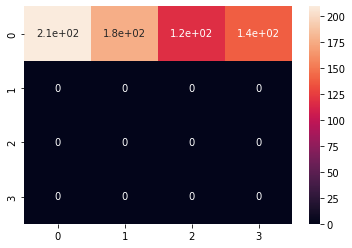

In [15]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(random_state=0).fit(statX_train, staty_train)
preds = logReg.predict(statX_test)

print(logReg.score(statX_test, staty_test))
rfcCM = confusion_matrix(preds, staty_test)
sns.heatmap(rfcCM, annot=True)

0.54375


<AxesSubplot:>

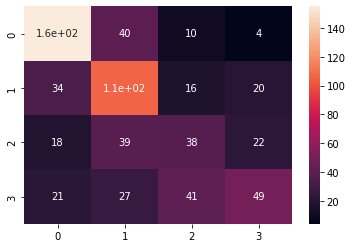

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(max_depth=None, random_state=36)
rfc.fit(statX_train, staty_train)
preds_rfc = rfc.predict(statX_test)
print(accuracy_score(staty_test, preds_rfc))

rfcCM = confusion_matrix(staty_test, preds_rfc)
sns.heatmap(rfcCM, annot=True)

0.3265625


<AxesSubplot:>

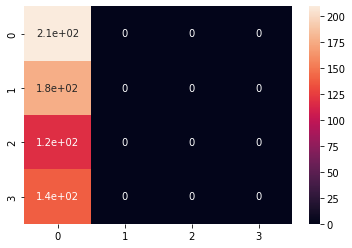

In [17]:
from sklearn.svm import SVC
clf= SVC(gamma='auto', C= 1, degree = 3, kernel = "rbf")
clf.fit(statX_train, staty_train)

preds2 = clf.predict(statX_test)
print(accuracy_score(staty_test, preds2))
rfcCM = confusion_matrix(staty_test, preds2)
sns.heatmap(rfcCM, annot=True)

0.50375


<AxesSubplot:>

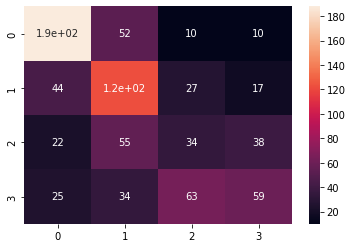

In [18]:
# test 
test = rfc.predict(X_val)
print(accuracy_score(y_val, test))

rfcCM = confusion_matrix(y_val, test)
sns.heatmap(rfcCM, annot=True)